In [1]:
%matplotlib inline
# All imports

from random import choice
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import time
from IPython import display

import sklearn
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.cross_validation import train_test_split

np.set_printoptions(formatter={'float': '{:.5f}'.format})
print(sklearn.__version__)


0.19.1


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# NOR GATE :

In [2]:
X = np.asarray([[0,0],[0,1],[1,0],[1,1]])
y = np.asarray([1,0,0,0])

In [3]:
clf = MLPClassifier(solver="lbfgs", alpha=1e-10, hidden_layer_sizes=(1,), activation = 'tanh', \
                    random_state=5, max_iter=1000000, learning_rate_init = 0.1)

In [4]:
clf.fit(X,y)

MLPClassifier(activation='tanh', alpha=1e-10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=1000000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [5]:
guess = np.asarray([[0,0]])
predict = clf.predict(guess)

In [6]:
print(predict)

[1]


In [7]:
for i in clf.coefs_:
    print (i)
print(clf.intercepts_)

[[-12.47975]
 [-19.97778]]
[[9.84893]]
[array([8.90750]), array([0.18106])]


In [8]:
Z= np.dot(clf.coefs_[0].T, X.T)

In [9]:
print(Z)

[[0.00000 -19.97778 -12.47975 -32.45753]]


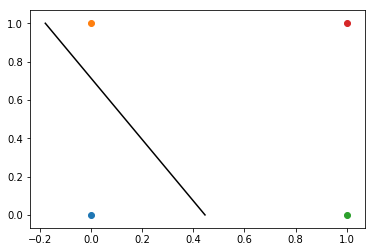

In [10]:
ymin, ymax = plt.ylim()
w = clf.coefs_[0]
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
yy = a * xx - (clf.intercepts_[0]) / w[1]
plt.plot(yy,xx, 'k-')
plt.scatter(X[0,0],X[0,1])
plt.scatter(X[1,0],X[1,1])
plt.scatter(X[2,0],X[2,1])
plt.scatter(X[3,0],X[3,1])


# XOR GATE :


In [11]:
X1 = np.asarray([[0,0],[0,1],[1,0],[1,1]])
y1 = np.asarray([0,1,1,0])

In [12]:
clf1 = MLPClassifier(solver="lbfgs", alpha=1e-10, hidden_layer_sizes=(2,), activation = 'tanh', \
                    random_state=5, max_iter=1000000, learning_rate_init = 0.1)


In [13]:
clf1.fit(X1,y1)

MLPClassifier(activation='tanh', alpha=1e-10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=1000000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [14]:
n = 1000
for i in range(n):
    MC_x = np.random.rand(n,1)
    MC_y = np.random.rand(n,1)
print(MC_x.shape, MC_y.shape)
MC_test = np.concatenate((MC_x,MC_y), axis =1)
print (MC_test.shape)
print(MC_test)

(1000, 1) (1000, 1)
(1000, 2)
[[0.02320 0.99195]
 [0.29873 0.21563]
 [0.09853 0.50751]
 ..., 
 [0.68605 0.87567]
 [0.77013 0.97324]
 [0.94599 0.99053]]


In [15]:
def abline(slope, intercept, xlim =[-1,2], ylim = [-1,2]):
    axes = plt.gca()
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope*x_vals
    plt.plot(x_vals,y_vals, '--')

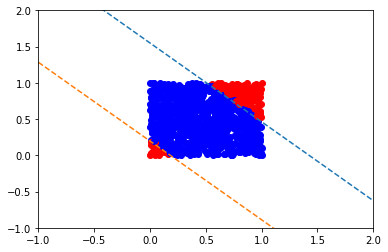

In [16]:
plt.scatter(X1[0,0],X1[0,1], color = 'red')
plt.scatter(X1[1,0],X1[1,1], color = 'blue')
plt.scatter(X1[2,0],X1[2,1], color = 'blue')
plt.scatter(X1[3,0],X1[3,1], color = 'red')
for point in MC_test:
    if clf1.predict(point.reshape(-1,1).T) == 0:
        plt.scatter(point[0],point[1], color = 'red')
    if clf1.predict(point.reshape(-1,1).T) == 1:
        plt.scatter(point[0],point[1], color = 'blue')
        
b1 = clf1.intercepts_[0][0]
w11 = clf1.coefs_[0][0][0]
w21 = clf1.coefs_[0][1][0]
slope1 = -(b1/w21)/(b1/w11)
intercept1 = -b1/w21


b2 = clf1.intercepts_[0][1]
w12 = clf1.coefs_[0][0][1]
w22 = clf1.coefs_[0][1][1]
slope2 = -(b2/w22)/(b2/w12)
intercept2 = -b2/w22

abline(slope1, intercept1)
abline(slope2,intercept2)

# QUADRATIC FUNC:


In [17]:
x = np.linspace(-10,10,100)
print(x.shape)
y = x**2

(100,)


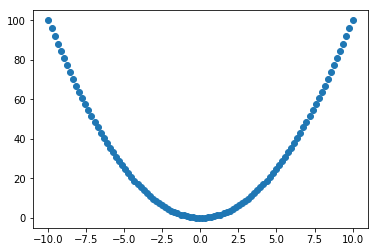

In [18]:
plt.scatter(x,y)

In [19]:
#add noise
noise_y = np.random.normal(0,1,y.shape[0])
yn=y+noise_y

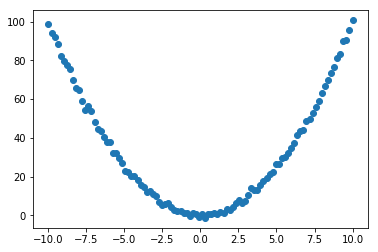

In [20]:
plt.scatter(x,yn)

In [21]:
quad_clf = MLPRegressor(solver="lbfgs", alpha=1e-10, hidden_layer_sizes=(10,2), activation = 'relu', \
                    random_state=5, max_iter=1000000, learning_rate_init = 0.1)


In [22]:
quad_clf.fit(x.reshape(-1,1), yn.astype('float'))


MLPRegressor(activation='relu', alpha=1e-10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 2), learning_rate='constant',
       learning_rate_init=0.1, max_iter=1000000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [23]:
x1 = np.sort(np.random.randn(10000)*10)

(0, 100)

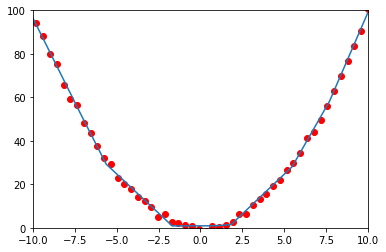

In [24]:
plt.plot(x1,quad_clf.predict(x1.reshape(-1,1)))
# plt.scatter(x,y)
plt.scatter(x[1::2],yn[1::2], color ='red')
plt.xlim([-10,10])
plt.ylim([0,100])

# Least Squares:


In [48]:
from sklearn.linear_model import LinearRegression

(100, 1)
(100, 1)


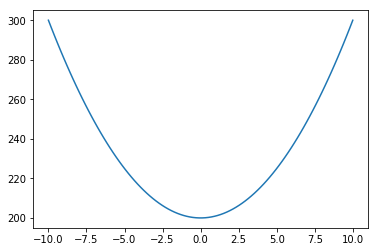

In [94]:
x = np.linspace(-10,10,100).reshape(-1,1)
print(x.shape)
y = x**2+2*np.random.normal(100,1)
print(y.shape)

plt.plot(x,y)


In [82]:
xnew = np.hstack([x,x**2,x**3,x**4])
xnew.shape

(400,)

In [62]:
model = LinearRegression()
model.fit(xnew, yn)
print(model.coef_)
print(model.intercept_)

[[0.00000 1.00000 0.00000]
 [0.00000 1.00000 0.00000]
 [-0.00000 1.00000 0.00000]
 [-0.00000 1.00000 0.00000]
 [-0.00000 1.00000 0.00000]
 [0.00000 1.00000 0.00000]
 [0.00000 1.00000 0.00000]
 [-0.00000 1.00000 0.00000]
 [-0.00000 1.00000 0.00000]
 [0.00000 1.00000 0.00000]
 [-0.00000 1.00000 0.00000]
 [0.00000 1.00000 0.00000]
 [0.00000 1.00000 0.00000]
 [0.00000 1.00000 0.00000]
 [0.00000 1.00000 0.00000]
 [0.00000 1.00000 0.00000]
 [0.00000 1.00000 0.00000]
 [-0.00000 1.00000 0.00000]
 [0.00000 1.00000 0.00000]
 [-0.00000 1.00000 0.00000]
 [0.00000 1.00000 0.00000]
 [0.00000 1.00000 0.00000]
 [0.00000 1.00000 0.00000]
 [-0.00000 1.00000 0.00000]
 [0.00000 1.00000 0.00000]
 [-0.00000 1.00000 0.00000]
 [-0.00000 1.00000 0.00000]
 [0.00000 1.00000 0.00000]
 [0.00000 1.00000 0.00000]
 [-0.00000 1.00000 0.00000]
 [-0.00000 1.00000 0.00000]
 [-0.00000 1.00000 0.00000]
 [-0.00000 1.00000 0.00000]
 [0.00000 1.00000 0.00000]
 [-0.00000 1.00000 0.00000]
 [0.00000 1.00000 0.00000]
 [0.00000 1.

In [65]:
ypred = model.predict(xnew)
ypred.shape


(100, 100)

ValueError: x and y must be the same size

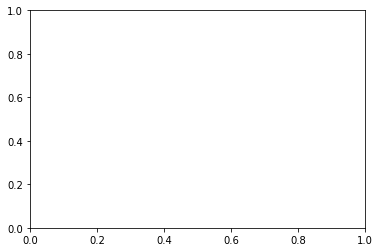

In [64]:
plt.scatter(x,yn)
xnew.shape
plt.plot[xnew[:,0],ypred]

(100,)


In [1062]:
z = np.polyfit(x, yn.astype('float'),3)

# QUADRATIC FUNC NOISE++:


In [1033]:
x = np.linspace(-10,10,100)
print(x.shape)
y = x**2

(100,)


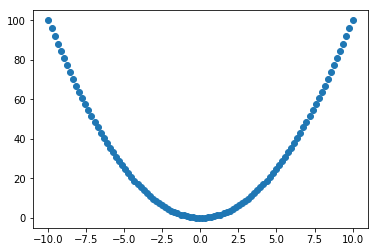

In [1034]:
plt.scatter(x,y)

In [1035]:
#add noise
noise_y = np.random.normal(0,5,y.shape[0])
yn=y+noise_y

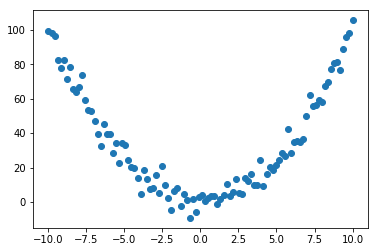

In [1036]:
plt.scatter(x,yn)

In [1045]:
quad_clf = MLPRegressor(solver="lbfgs", alpha=1e-10, hidden_layer_sizes=(1000), activation = 'relu', \
                    random_state=5, max_iter=1000000, learning_rate_init = 0.1)


In [1046]:
quad_clf.fit(x.reshape(-1,1), yn.astype('float'))


MLPRegressor(activation='relu', alpha=1e-10, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=1000, learning_rate='constant',
       learning_rate_init=0.1, max_iter=1000000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=5, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [1047]:
x1 = np.sort(np.random.randn(10000)*10)

(0, 100)

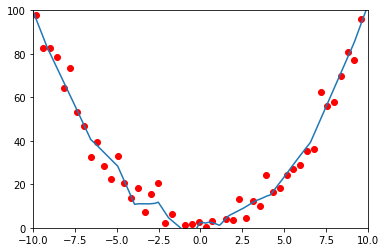

In [1048]:
plt.plot(x1,quad_clf.predict(x1.reshape(-1,1)))
# plt.scatter(x,y)
plt.scatter(x[1::2],yn[1::2], color ='red')
plt.xlim([-10,10])
plt.ylim([0,100])